<a href="https://colab.research.google.com/github/ekimenkolev/Database/blob/main/lab3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

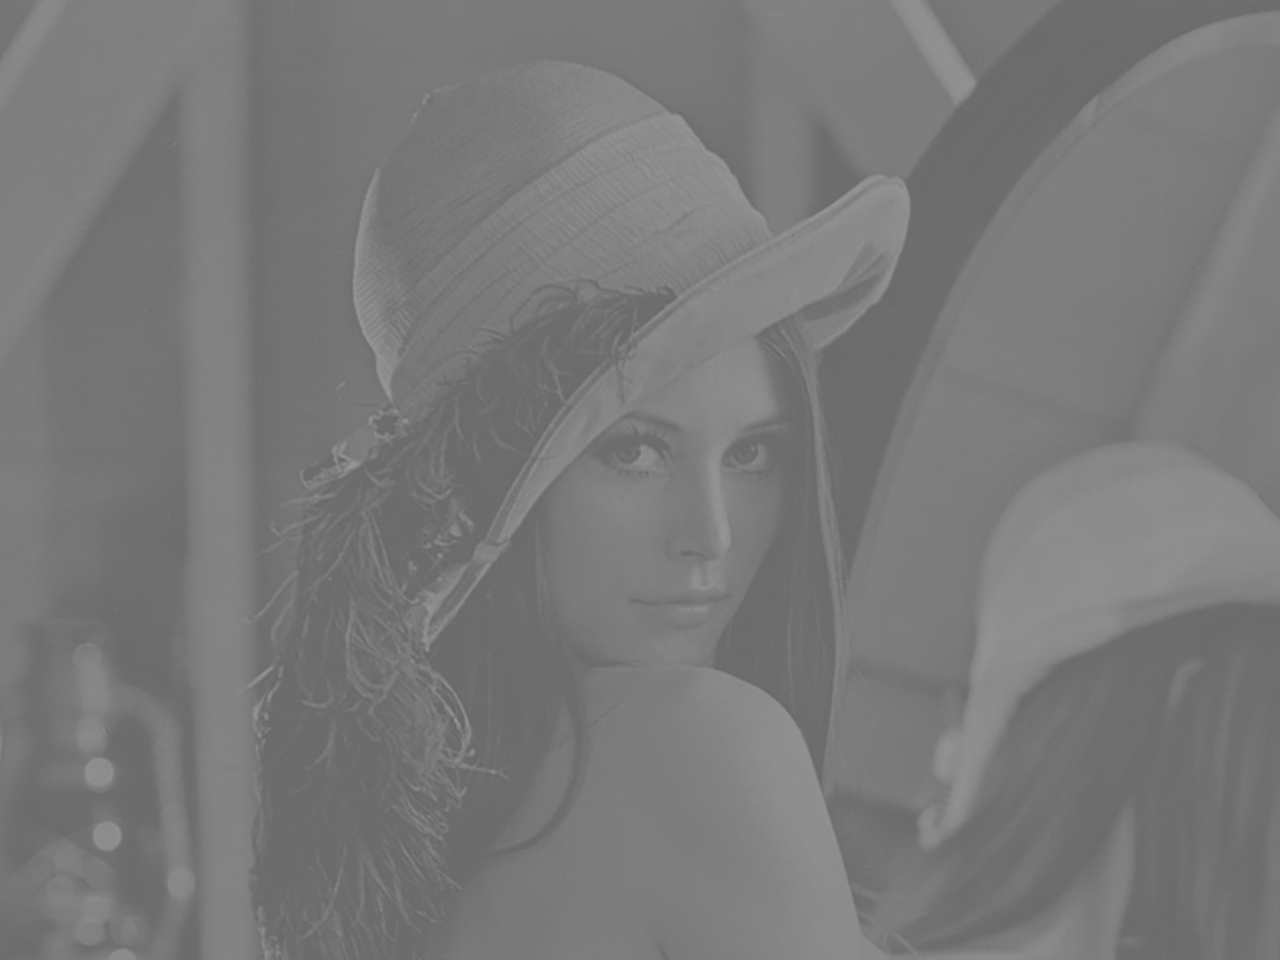

In [24]:
from google.colab.patches import cv2_imshow
import cv2
import numpy as np

# Загружаем изображение
image = cv2.imread('image.jpg', cv2.IMREAD_GRAYSCALE)

# Нормализация интенсивностей пикселей
new_min = 102
new_max = 152

# Масштабирование интенсивностей
normalized_image = cv2.normalize(image, None, alpha=new_min, beta=new_max, norm_type=cv2.NORM_MINMAX)

output_path = 'gray_image.jpg'
cv2.imwrite(output_path, normalized_image)

cv2_imshow(normalized_image)

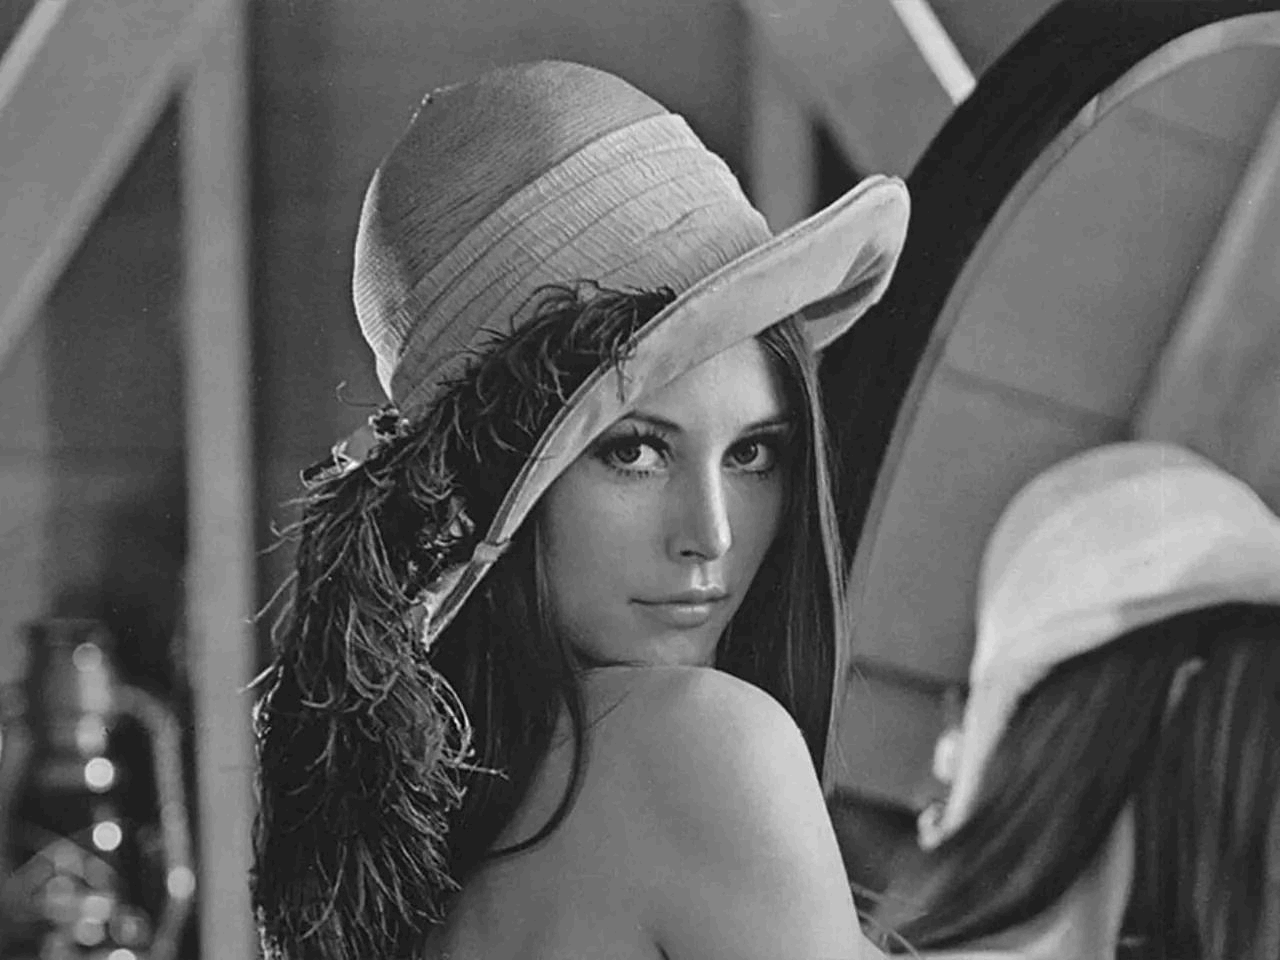

In [40]:
from google.colab.patches import cv2_imshow
import cv2
import numpy as np

# Предполагаем, что normalized_image - это уже нормализованное изображение
# Загружаем нормализованное изображение
normalized_image = cv2.imread('gray_image.jpg')

# Исходные значения для обратного масштабирования
original_min = 0
original_max = 255

# коэффициенты для обратного масштабирования
# показывает, во сколько раз необходимо увеличить или уменьшить
# значения интенсивности нормализованного изображения, чтобы вернуть их к оригинальному диапазону.
scale = (original_max - original_min) / (new_max - new_min)
# вычисляется для коррекции позиции начала диапазона после масштабирования.
# new_min * scale преобразует минимальное значение нормализованного диапазона обратно в масштаб оригинального изображения,
# мы определяем необходимое смещение для коррекции всего диапазона значений.
shift =original_min -new_min * scale

# Применяем обратное масштабирование
# new_x = x*scale+shift
reversed_image = cv2.convertScaleAbs(normalized_image, alpha=scale, beta=shift)

# Сохраняем и показываем результат
reversed_output_path = 'reversed_gray_image.jpg'
cv2.imwrite(reversed_output_path, reversed_image)

cv2_imshow(reversed_image)


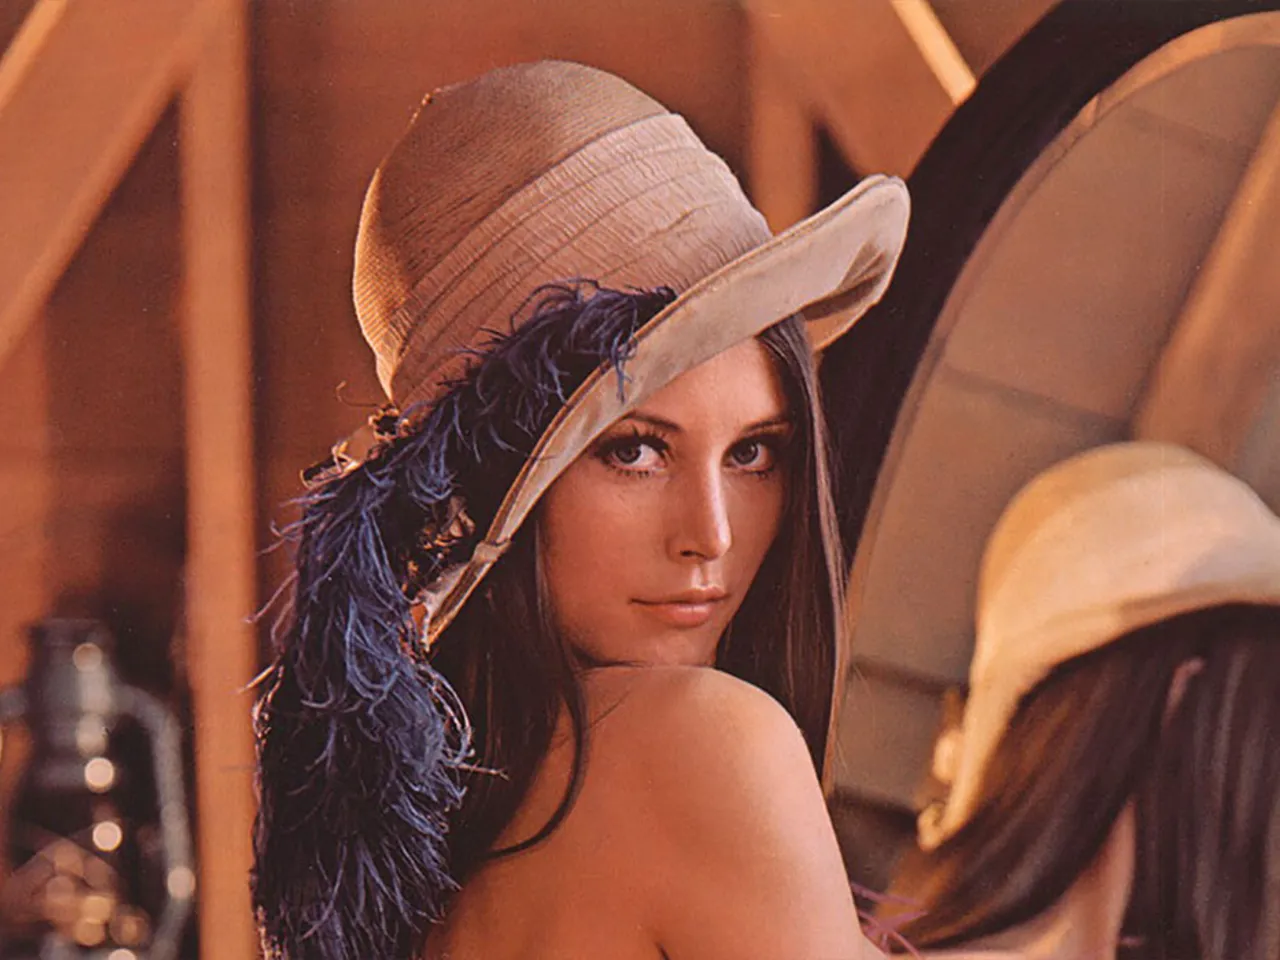

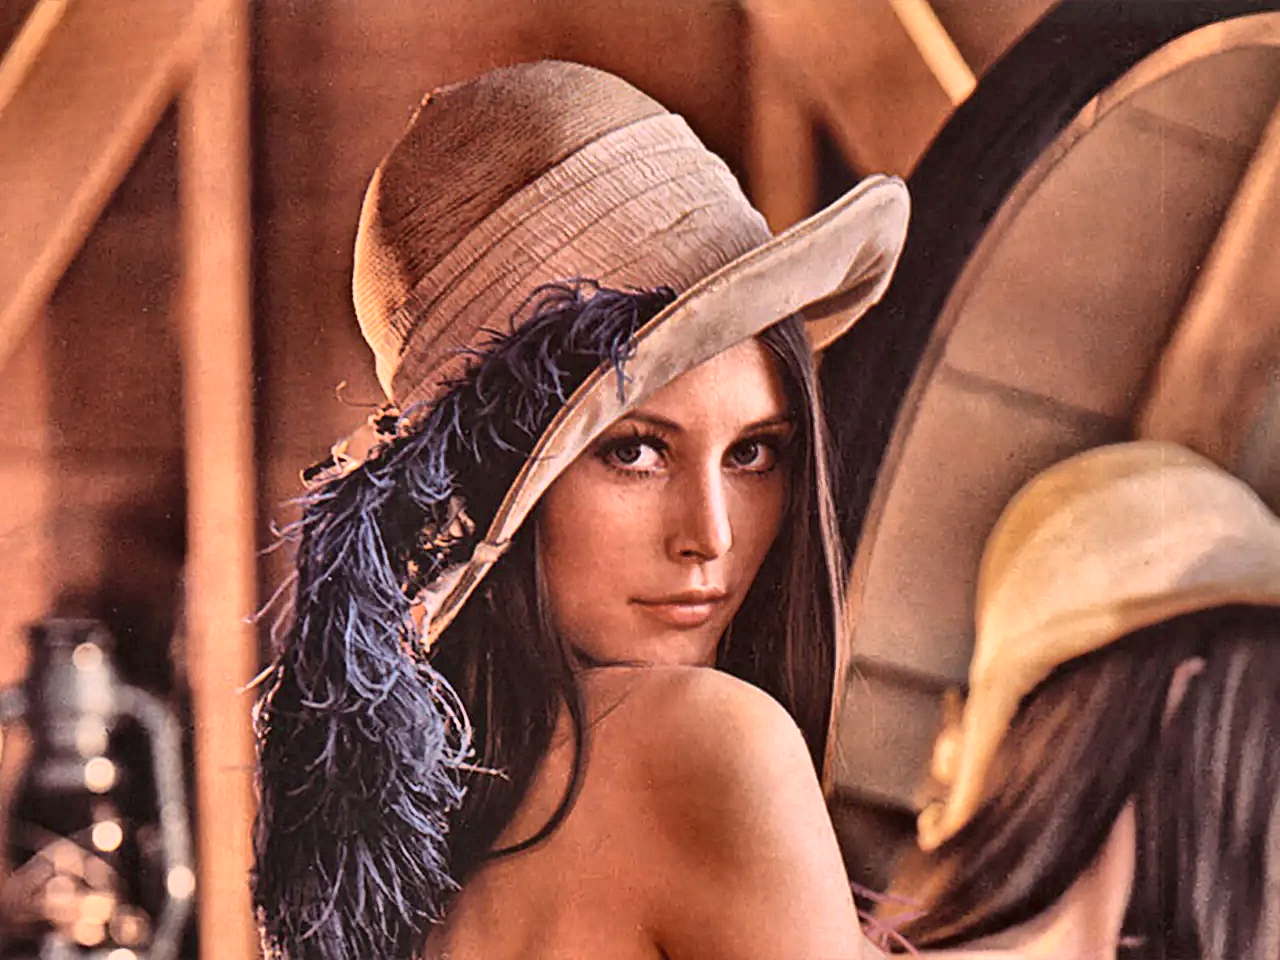

In [45]:
from google.colab.patches import cv2_imshow
import cv2
import numpy as np

image = cv2.imread('image.jpg')

# Преобразование изображения в LAB для отдельной обработки канала яркости
lab_image = cv2.cvtColor(image, cv2.COLOR_BGR2LAB)

# Разделение каналов
# Значения L идут от 0 (чёрный) до 255 (белый).
# Значения a переходят от зелёного к красному.
# Разделение на каналы
l, a, b = cv2.split(lab_image)

# Создание объекта CLAHE
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))

# Применение CLAHE к каналу яркости L
l_clahe = clahe.apply(l)

# Объединение каналов обратно
lab_image_clahe = cv2.merge((l_clahe, a, b))

# Преобразование изображения обратно в BGR для отображения
image_clahe = cv2.cvtColor(lab_image_clahe, cv2.COLOR_LAB2BGR)

# Отображение оригинального и обработанного изображений
cv2_imshow(image)  # Оригинальное изображение
cv2_imshow(image_clahe)  # Изображение после применения CLAHE
